In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("FastFoodSales.csv")

In [3]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [4]:
df.tail()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon
999,1000,5/29/2022,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [7]:
df.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [11]:
df["transaction_type"]=df["transaction_type"].fillna("Unknown")
df.isnull().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [13]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

In [14]:
df["date"]=pd.to_datetime(df["date"])

In [15]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["dayname"]=df["date"].dt.day_name()
df["monthnaame"]=df["date"].dt.month_name()
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,dayname,monthnaame
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Unknown,Mr.,Night,2022,7,Sunday,July
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022,8,Tuesday,August
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022,11,Sunday,November
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023,2,Friday,February
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022,10,Sunday,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Unknown,Mrs.,Evening,2023,3,Sunday,March
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Unknown,Mr.,Evening,2022,9,Tuesday,September
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Unknown,Mr.,Evening,2023,1,Thursday,January
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Unknown,Mrs.,Afternoon,2022,8,Saturday,August


In [16]:
np.unique(df['year'])

array([2022, 2023], dtype=int64)

In [17]:
df["year"].value_counts()

2022    746
2023    254
Name: year, dtype: int64

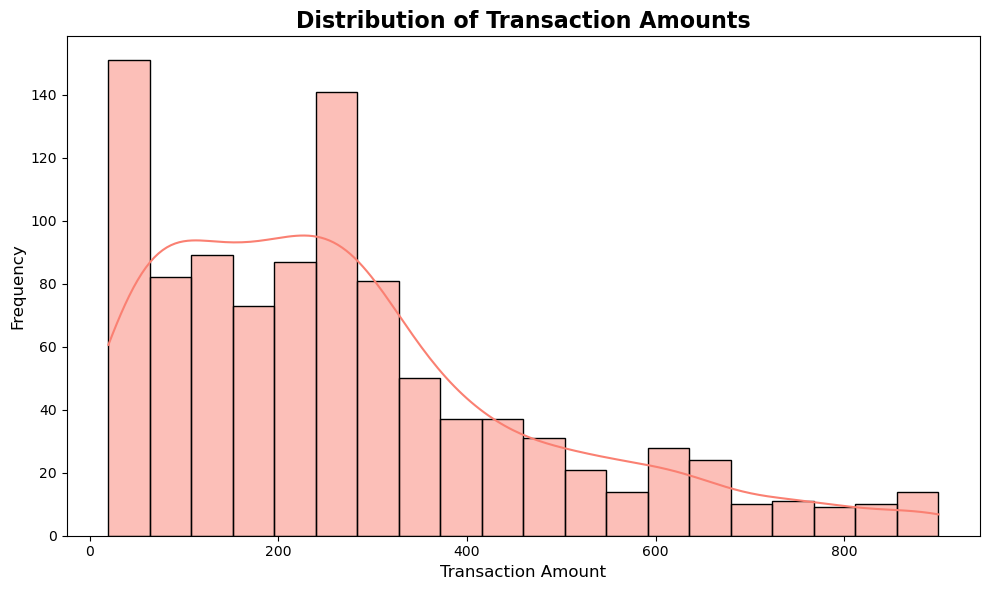

In [90]:
plt.figure(figsize=(10, 6))
sbn.histplot(df['transaction_amount'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Transaction Amounts', fontsize=16, weight='bold')
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Selling Food')

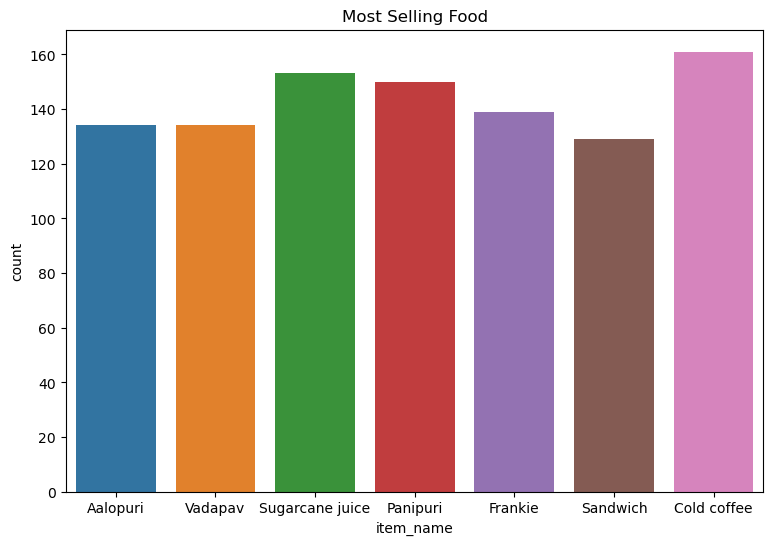

In [84]:
plt.figure(figsize=(9,6))
sbn.countplot(x="item_name", data=df)
plt.title("Most Selling Food" )

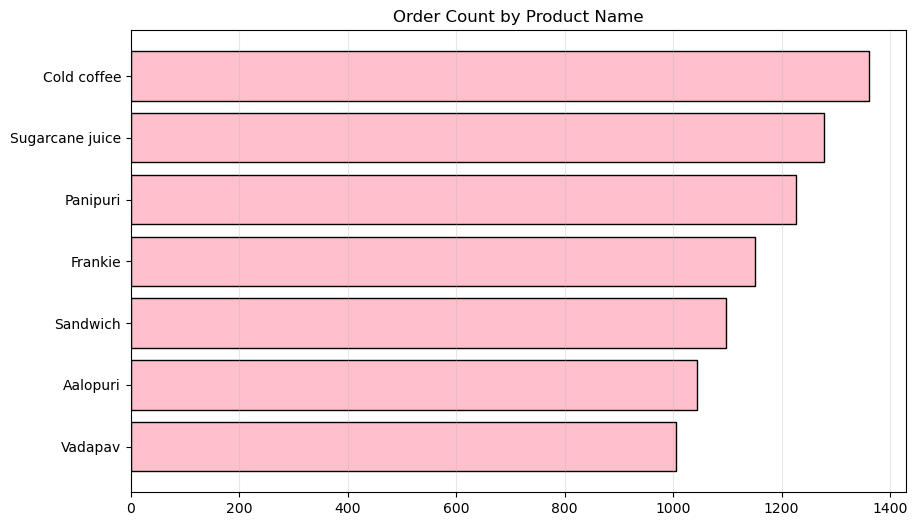

In [82]:
plt.figure(figsize=(10,6))
sorted_data = df.groupby('item_name')['quantity'].sum().sort_values(ascending=True)
plt.barh(sorted_data.index, sorted_data.values, edgecolor = 'black', color = 'pink')
plt.title("Order Count by Product Name")
plt.grid(axis = 'x', alpha = 0.3)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

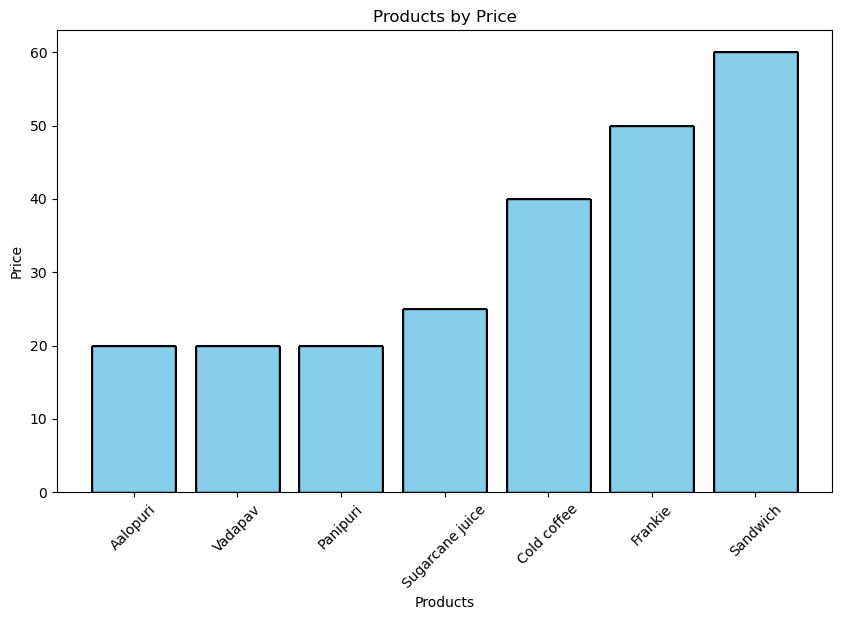

In [86]:
plt.figure(figsize=(10,6))
price_sorted = df['item_price'].argsort()
plt.bar(df['item_name'][price_sorted],df['item_price'][price_sorted], edgecolor = 'black', color = 'skyblue')
plt.title("Products by Price")
plt.xlabel("Products")
plt.ylabel("Price")
plt.xticks(rotation = 45)

In [19]:
food_sales=df.groupby("item_name")["transaction_amount"].sum().sort_values(ascending=False)
food_sales

item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Aalopuri           20880
Vadapav            20120
Name: transaction_amount, dtype: int64

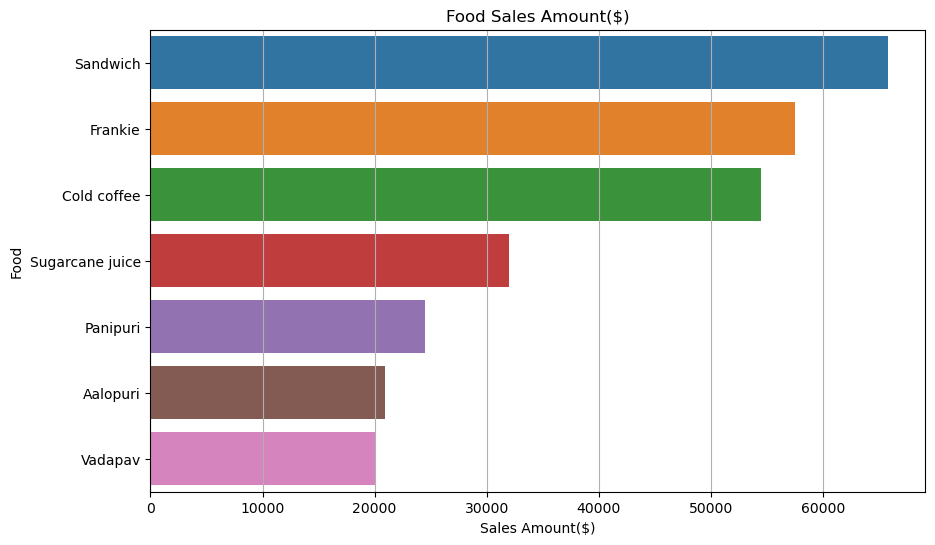

In [20]:
plt.figure(figsize=(10,6))
sbn.barplot(x=food_sales.values, y=food_sales.index )
plt.title("Food Sales Amount($)")
plt.xlabel("Sales Amount($)")
plt.ylabel("Food")
plt.grid(axis="x")
plt.show()

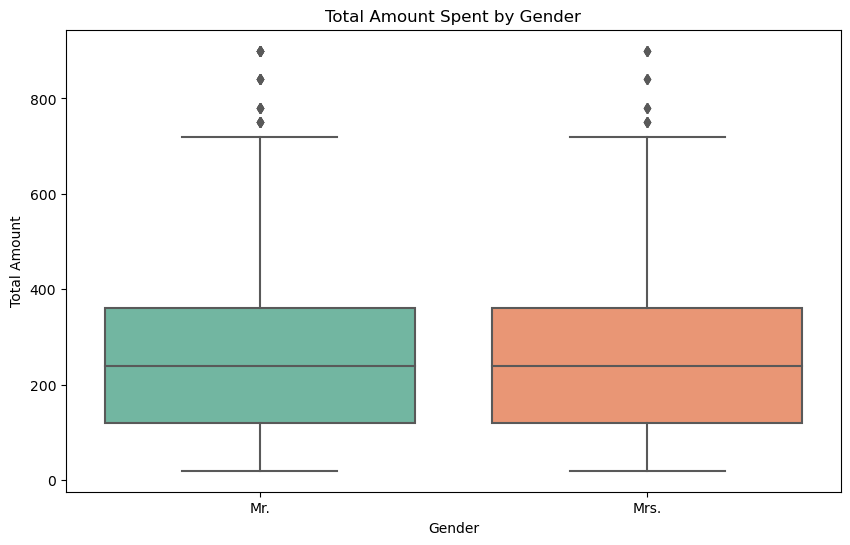

In [62]:
plt.figure(figsize=(10, 6))
palette = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
sbn.boxplot(data=df, x='received_by', y='transaction_amount', palette=palette)
plt.title('Total Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Aalopuri'),
  Text(1, 0, 'Vadapav'),
  Text(2, 0, 'Sugarcane juice'),
  Text(3, 0, 'Panipuri'),
  Text(4, 0, 'Frankie'),
  Text(5, 0, 'Sandwich'),
  Text(6, 0, 'Cold coffee')])

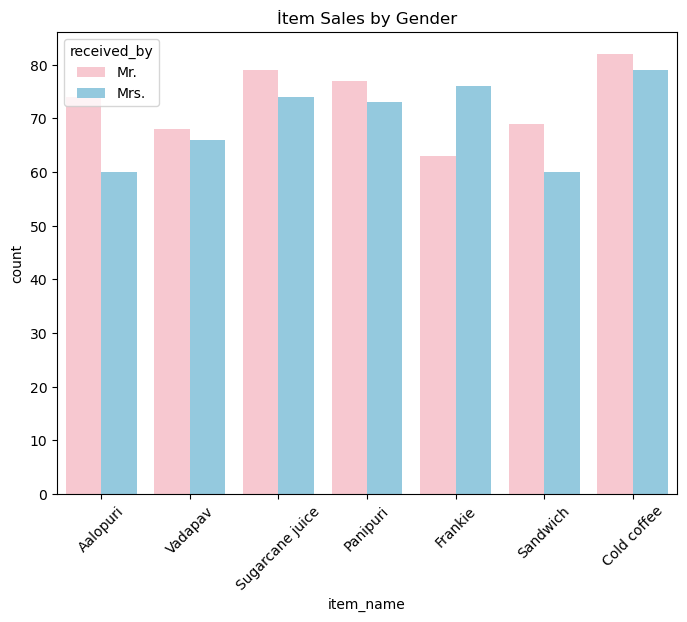

In [23]:
plt.figure(figsize=(8, 6))
sbn.countplot(data=df, x='item_name', hue='received_by',palette=['pink','skyblue','green'])
plt.title("İtem Sales by Gender");
plt.xticks(rotation=45)

time_of_sale     Afternoon  Evening  Midnight  Morning  Night
item_name                                                    
Aalopuri                29       19        33       27     26
Cold coffee             34       30        26       32     39
Frankie                 31       29        22       23     34
Panipuri                28       36        31       29     26
Sandwich                19       29        26       25     30
Sugarcane juice         41       32        28       25     27
Vadapav                 23       26        33       29     23


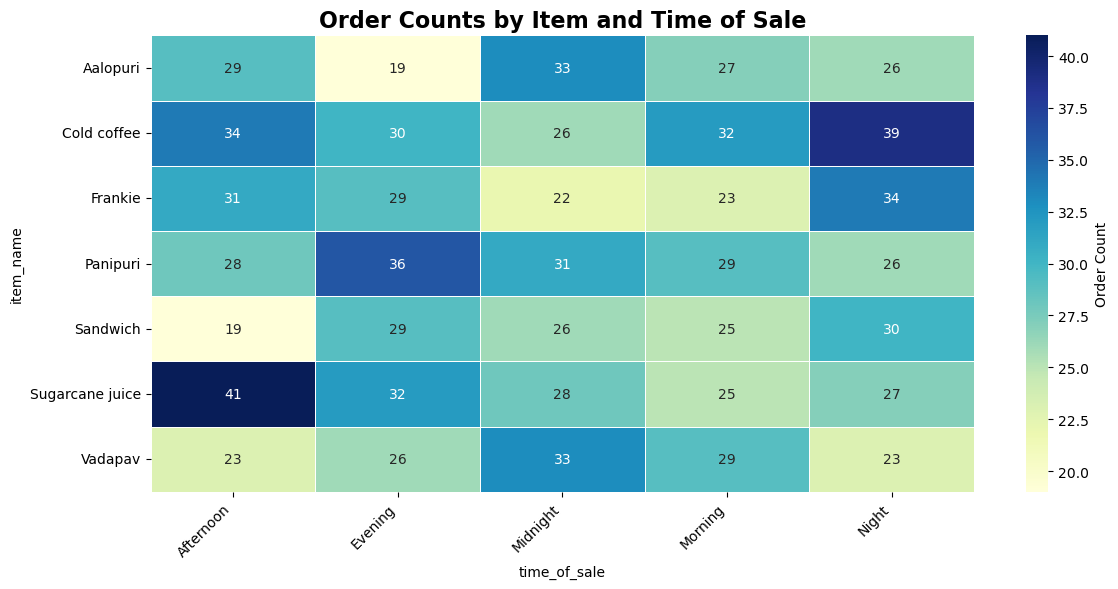

In [88]:
pivot_data = pd.pivot_table(
    df, 
    columns='time_of_sale', 
    index='item_name', 
    values='order_id', 
    aggfunc='count'
)

print(pivot_data)


plt.figure(figsize=(12, 6))
ax = sbn.heatmap(
    pivot_data, 
    annot=True,       
    cmap='YlGnBu',     
    fmt='d',           
    linewidths=0.5,    
    cbar_kws={'label': 'Order Count'},  
)


plt.title('Order Counts by Item and Time of Sale', fontsize=16, weight='bold')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [24]:
df.sample()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,dayname,monthnaame
842,843,2022-07-04,Sugarcane juice,Beverages,25,1,25,Cash,Mrs.,Morning,2022,7,Monday,July


In [26]:
months_sale=df["monthnaame"].value_counts()
months_sale

May          100
October       98
August        90
December      90
January       90
February      83
November      82
March         81
July          79
September     73
June          68
April         66
Name: monthnaame, dtype: int64

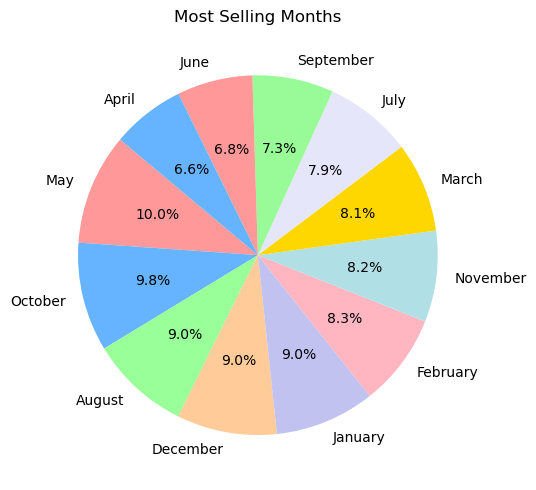

In [31]:
plt.figure(figsize=(10,5))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', 
          '#FFB6C1', '#B0E0E6', '#FFD700', '#E6E6FA', '#98FB98']
plt.title('Most Selling Months')
plt.pie(months_sale , labels=months_sale.index , colors=colors,autopct='%1.1f%%', 
        startangle=140
        )

plt.tight_layout()
plt.show()

In [28]:
df[df["monthnaame"]=="May"].groupby("item_type").sum()

,order_id,item_price,quantity,transaction_amount,year,month
item_type,,,,,,
Beverages,16584,960,237,7680,60660,150
Fastfood,33217,2230,589,18890,141540,350


In [29]:
df[df["monthnaame"]=="May"].groupby("item_name").sum()

,order_id,item_price,quantity,transaction_amount,year,month
item_name,,,,,,
Aalopuri,12205,460,191,3820,46506,115
Cold coffee,8433,560,117,4680,28308,70
Frankie,7166,650,137,6850,26286,65
Panipuri,2646,160,70,1400,16176,40
Sandwich,5295,660,75,4500,22242,55
Sugarcane juice,8151,400,120,3000,32352,80
Vadapav,5905,300,116,2320,30330,75


In [33]:
month_amount=df.groupby("monthnaame")["transaction_amount"].sum()
month_amount

monthnaame
April        17670
August       22305
December     23460
February     25595
January      28670
July         19490
June         17335
March        25390
May          26570
November     22900
October      27205
September    18640
Name: transaction_amount, dtype: int64

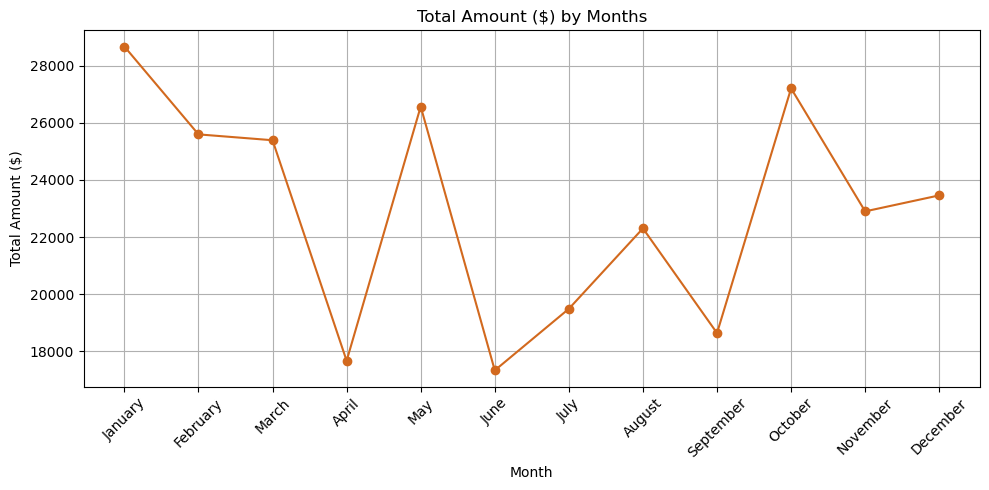

In [34]:
plt.figure(figsize=(10,5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = df.groupby('monthnaame')['transaction_amount'].sum().reindex(month_order, fill_value=0)
ax = monthly_sales.plot(kind='line', marker='o', color='#D2691E')
ax.set_title("Total Amount ($) by Months")
ax.set_xlabel("Month")
ax.set_ylabel("Total Amount ($)")
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

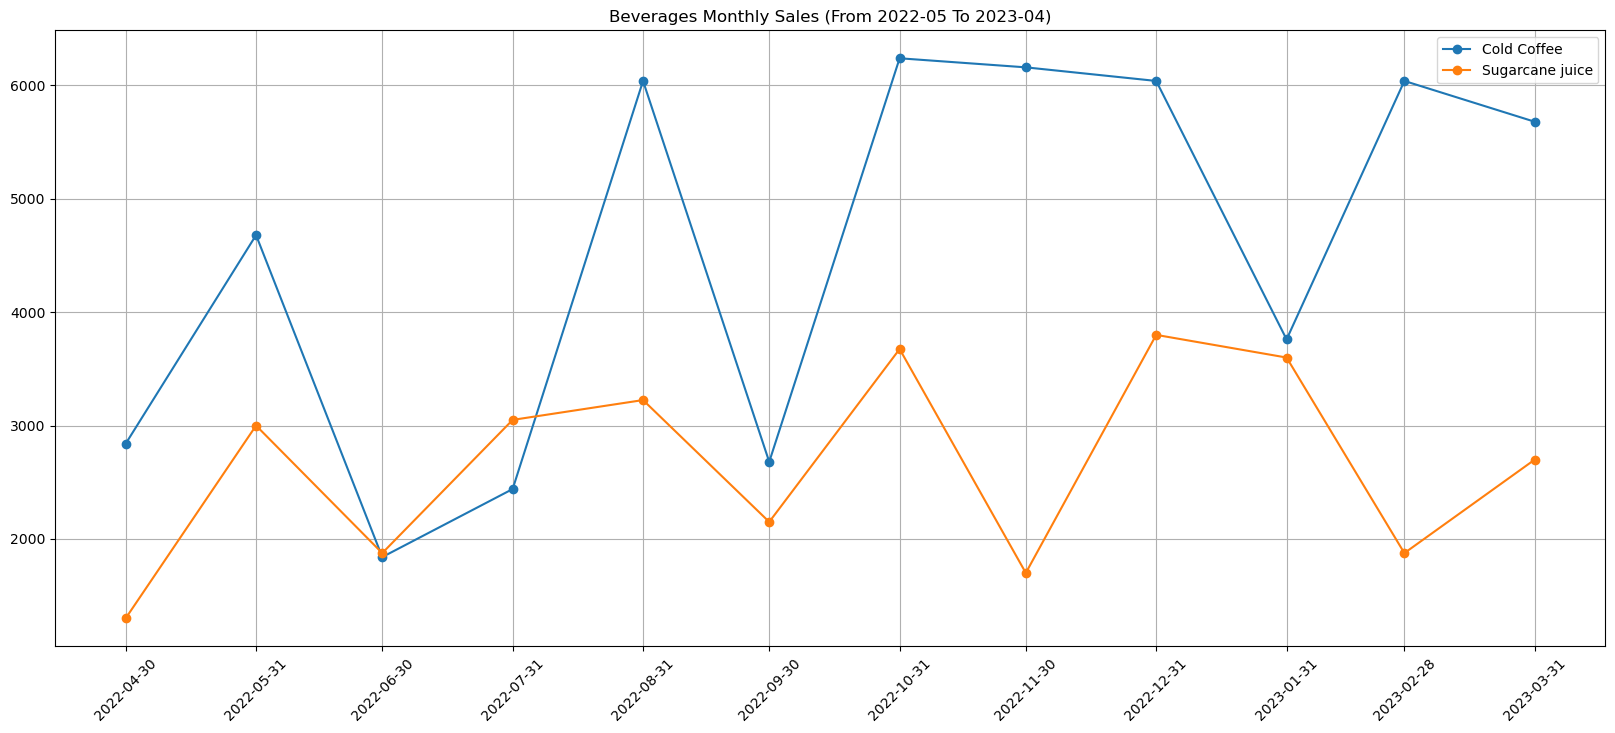

In [68]:
coffee = df[df['item_name'] == 'Cold coffee']
coffee = coffee.set_index('date')  
coffee = coffee['transaction_amount'].resample('M').sum()
coffee = coffee.reset_index()


sugarcane = df[df['item_name'] == 'Sugarcane juice']
sugarcane = sugarcane.set_index('date') 
sugarcane = sugarcane['transaction_amount'].resample('M').sum()
sugarcane = sugarcane.reset_index()


plt.figure(figsize=(20,8))
plt.plot(coffee['date'], coffee['transaction_amount'], marker='o', label='Cold Coffee')
plt.plot(sugarcane['date'], sugarcane['transaction_amount'], marker='o', label='Sugarcane juice')
plt.title('Beverages Monthly Sales (From 2022-05 To 2023-04)')
plt.xticks(coffee['date'], rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [69]:
np.unique(df["item_name"])

array(['Aalopuri', 'Cold coffee', 'Frankie', 'Panipuri', 'Sandwich',
       'Sugarcane juice', 'Vadapav'], dtype=object)

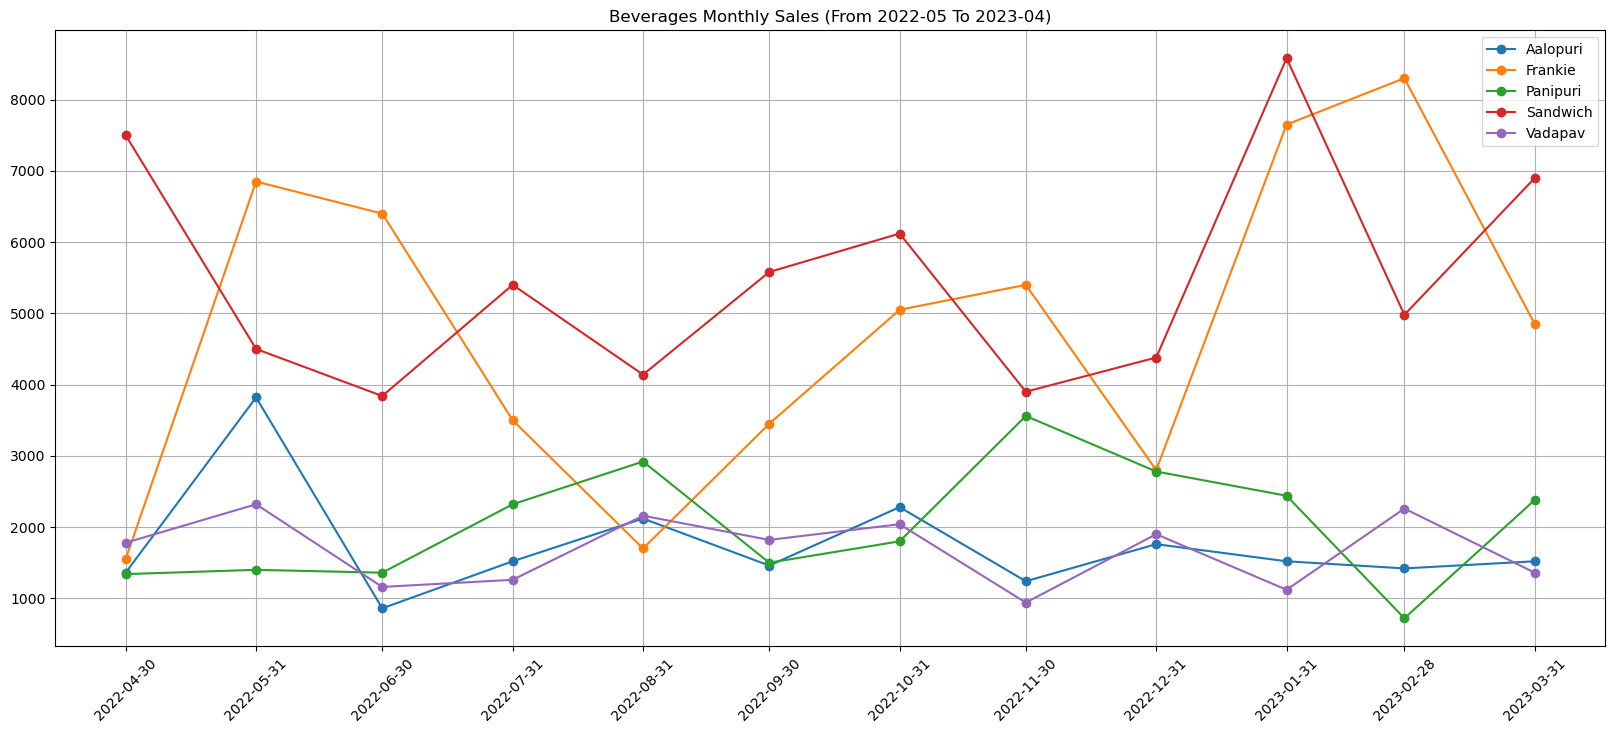

In [71]:
Aalopuri = df[df['item_name'] == 'Aalopuri']
Aalopuri = Aalopuri.set_index('date')  
Aalopuri = Aalopuri['transaction_amount'].resample('M').sum()
Aalopuri = Aalopuri.reset_index()

Frankie = df[df['item_name'] == 'Frankie']
Frankie = Frankie.set_index('date')  
Frankie = Frankie['transaction_amount'].resample('M').sum()
Frankie = Frankie.reset_index()

Panipuri = df[df['item_name'] == 'Panipuri']
Panipuri = Panipuri.set_index('date')  
Panipuri = Panipuri['transaction_amount'].resample('M').sum()
Panipuri = Panipuri.reset_index()

Sandwich = df[df['item_name'] == 'Sandwich']
Sandwich = Sandwich.set_index('date')  
Sandwich = Sandwich['transaction_amount'].resample('M').sum()
Sandwich = Sandwich.reset_index()

Vadapav = df[df['item_name'] == 'Vadapav']
Vadapav = Vadapav.set_index('date')  
Vadapav = Vadapav['transaction_amount'].resample('M').sum()
Vadapav = Vadapav.reset_index()

plt.figure(figsize=(20,8))
plt.plot(Aalopuri['date'], Aalopuri['transaction_amount'], marker='o', label='Aalopuri')
plt.plot(Frankie['date'], Frankie['transaction_amount'], marker='o', label='Frankie')
plt.plot(Panipuri['date'], Panipuri['transaction_amount'], marker='o', label='Panipuri')
plt.plot(Sandwich['date'], Sandwich['transaction_amount'], marker='o', label='Sandwich')
plt.plot(Vadapav['date'], Vadapav['transaction_amount'], marker='o', label='Vadapav')
plt.title('Beverages Monthly Sales (From 2022-05 To 2023-04)')
plt.xticks(Aalopuri['date'], rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [35]:
df.sample()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,dayname,monthnaame
79,80,2022-05-24,Frankie,Fastfood,50,13,650,Cash,Mr.,Evening,2022,5,Tuesday,May


In [38]:
day_amount=df.groupby("dayname")["transaction_amount"].sum()
day_amount

dayname
Friday       36050
Monday       40930
Saturday     37910
Sunday       43970
Thursday     39905
Tuesday      36085
Wednesday    40380
Name: transaction_amount, dtype: int64

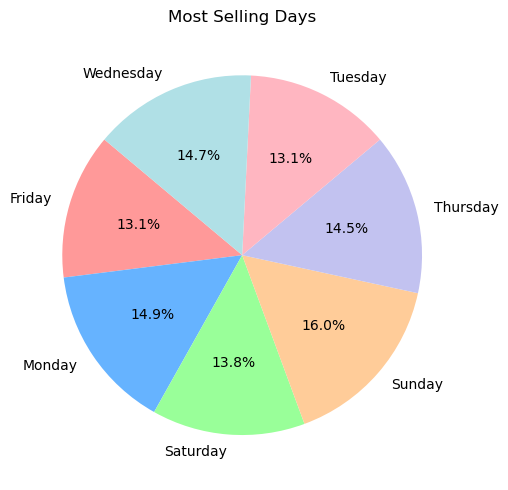

In [58]:
plt.figure(figsize=(10,5))
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', 
          '#FFB6C1', '#B0E0E6', '#FFD700', '#E6E6FA', '#98FB98']
plt.title('Most Selling Days')
plt.pie(day_amount , labels=day_amount.index , colors=colors,autopct='%1.1f%%', 
        startangle=140
        )

plt.tight_layout()
plt.show()

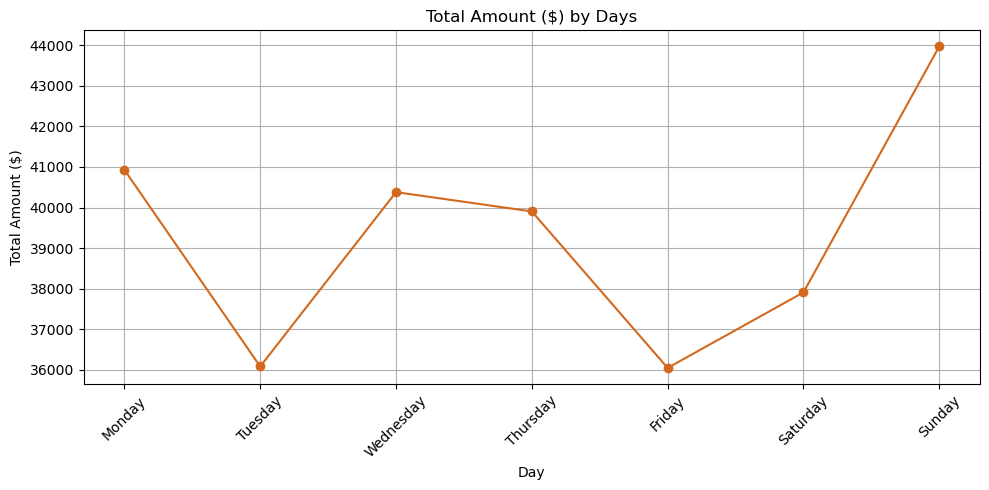

In [39]:
plt.figure(figsize=(10,5))
daily_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('dayname')['transaction_amount'].sum().reindex(daily_order, fill_value=0)
ax = daily_sales.plot(kind='line', marker='o', color='#D2691E')
ax.set_title("Total Amount ($) by Days")
ax.set_xlabel("Day")
ax.set_ylabel("Total Amount ($)")
ax.set_xticks(range(len(daily_order)))
ax.set_xticklabels(daily_order, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
transaction_type=df["transaction_type"].value_counts()

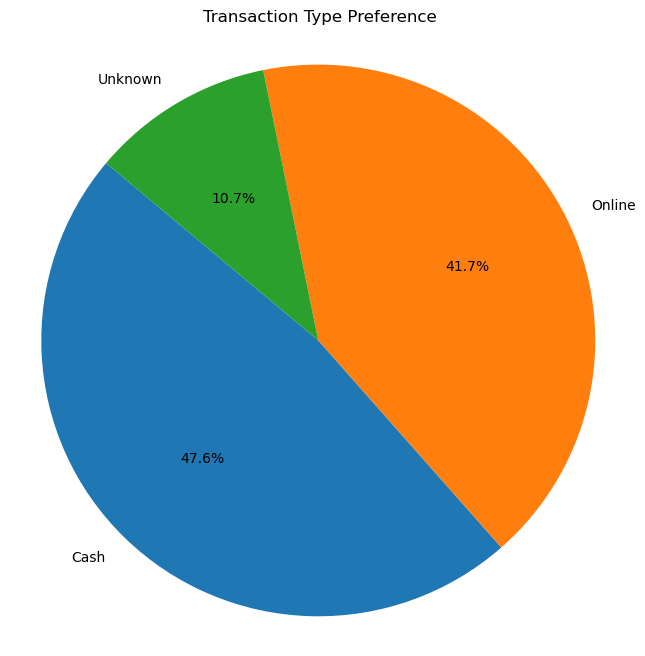

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(transaction_type, labels=transaction_type.index, autopct='%1.1f%%', startangle=140)
plt.title("Transaction Type Preference")
plt.axis('equal') 
plt.show()

In [45]:
df.sample()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,dayname,monthnaame
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night,2022,12,Thursday,December


In [46]:
type_sales=df.groupby("item_type")["transaction_amount"].sum()

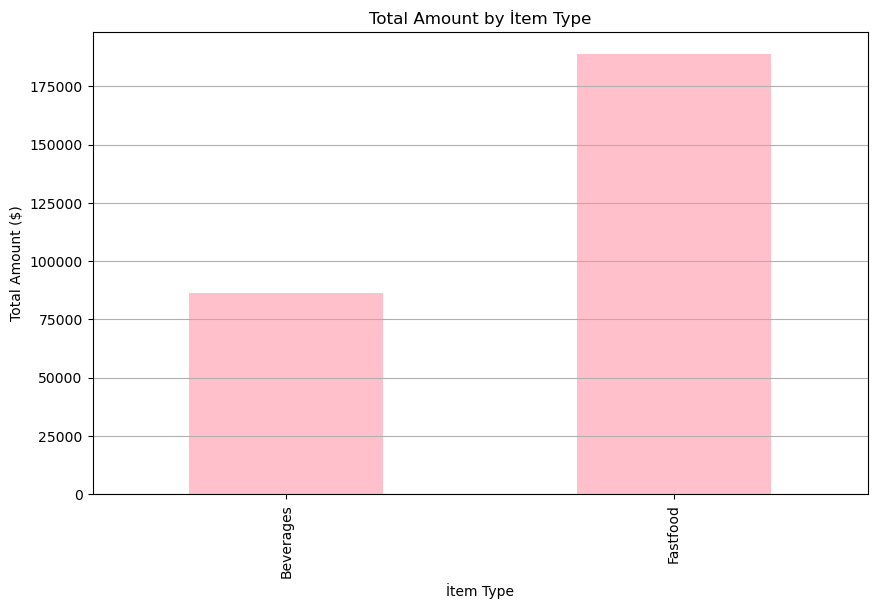

In [47]:
plt.figure(figsize=(10,6))
type_sales.plot(kind="bar",color="pink")
plt.title("Total Amount by İtem Type")
plt.xlabel("İtem Type")
plt.ylabel("Total Amount ($)")
plt.grid(axis="y")
plt.show()

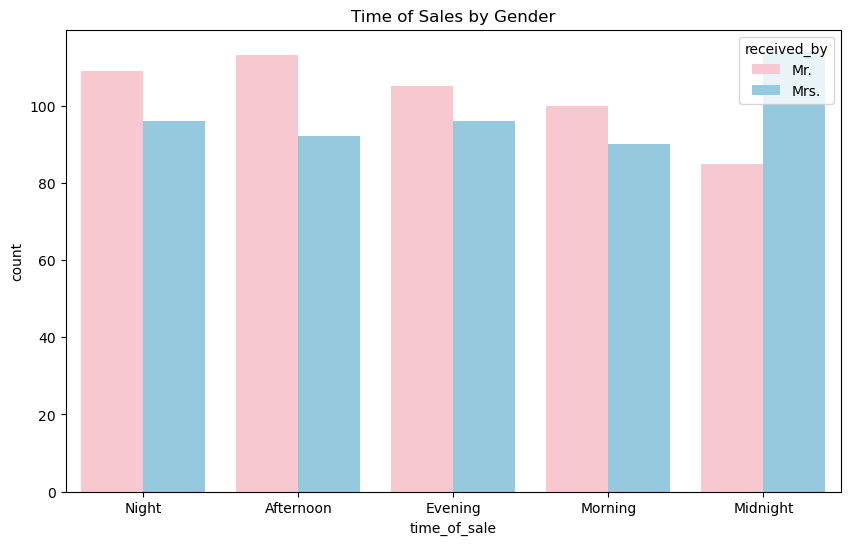

In [49]:
plt.figure(figsize=(10,6))
sbn.countplot(x="time_of_sale", data=df , hue='received_by',palette=['pink','skyblue','green'])
plt.title("Time of Sales by Gender")
plt.show()

In [72]:
time_order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']

tod_sandwich = df[df['item_name'] == 'Sandwich']
tod_sandwich = tod_sandwich.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_sandwich['time_of_sale'] = pd.Categorical(tod_sandwich['time_of_sale'], categories=time_order, ordered=True)
tod_sandwich = tod_sandwich.sort_values('time_of_sale')
tod_sandwich

,time_of_sale,transaction_amount
3,Morning,14040
0,Afternoon,9840
1,Evening,12360
4,Night,17520
2,Midnight,12060


In [73]:
tod_coldcoffee = df[df['item_name'] == 'Cold coffee']
tod_coldcoffee = tod_coldcoffee.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_coldcoffee['time_of_sale'] = pd.Categorical(tod_coldcoffee['time_of_sale'], categories=time_order, ordered=True)
tod_coldcoffee = tod_coldcoffee.sort_values('time_of_sale')
tod_coldcoffee

,time_of_sale,transaction_amount
3,Morning,11480
0,Afternoon,13480
1,Evening,9400
4,Night,11960
2,Midnight,8120


In [74]:
tod_frankie = df[df['item_name'] == 'Frankie']
tod_frankie = tod_frankie.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_frankie['time_of_sale'] = pd.Categorical(tod_frankie['time_of_sale'], categories=time_order, ordered=True)
tod_frankie = tod_frankie.sort_values('time_of_sale')
tod_frankie

,time_of_sale,transaction_amount
3,Morning,10200
0,Afternoon,11900
1,Evening,12000
4,Night,13500
2,Midnight,9900


In [79]:
tod_sugarcane = df[df['item_name'] == 'Sugarcane juice']
tod_sugarcane = tod_sugarcane.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_sugarcane['time_of_sale'] = pd.Categorical(tod_sugarcane['time_of_sale'], categories=time_order, ordered=True)
tod_sugarcane = tod_sugarcane.sort_values('time_of_sale')
tod_sugarcane

,time_of_sale,transaction_amount
3,Morning,5150
0,Afternoon,8125
1,Evening,7075
4,Night,5675
2,Midnight,5925


In [75]:
tod_panipuri = df[df['item_name'] == 'Panipuri']
tod_panipuri = tod_panipuri.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_panipuri['time_of_sale'] = pd.Categorical(tod_panipuri['time_of_sale'], categories=time_order, ordered=True)
tod_panipuri = tod_panipuri.sort_values('time_of_sale')
tod_panipuri

,time_of_sale,transaction_amount
3,Morning,4660
0,Afternoon,4600
1,Evening,4820
4,Night,4880
2,Midnight,5560


In [76]:
tod_vadapav = df[df['item_name'] == 'Vadapav']
tod_vadapav = tod_vadapav.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_vadapav['time_of_sale'] = pd.Categorical(tod_vadapav['time_of_sale'], categories=time_order, ordered=True)
tod_vadapav = tod_vadapav.sort_values('time_of_sale')
tod_vadapav

,time_of_sale,transaction_amount
3,Morning,3900
0,Afternoon,3880
1,Evening,3980
4,Night,3660
2,Midnight,4700


In [77]:
tod_aalopuri = df[df['item_name'] == 'Aalopuri']
tod_aalopuri = tod_aalopuri.groupby('time_of_sale')['transaction_amount'].sum().reset_index()
tod_aalopuri['time_of_sale'] = pd.Categorical(tod_aalopuri['time_of_sale'], categories=time_order, ordered=True)
tod_aalopuri = tod_aalopuri.sort_values('time_of_sale')
tod_aalopuri

,time_of_sale,transaction_amount
3,Morning,4300
0,Afternoon,4520
1,Evening,2720
4,Night,4880
2,Midnight,4460


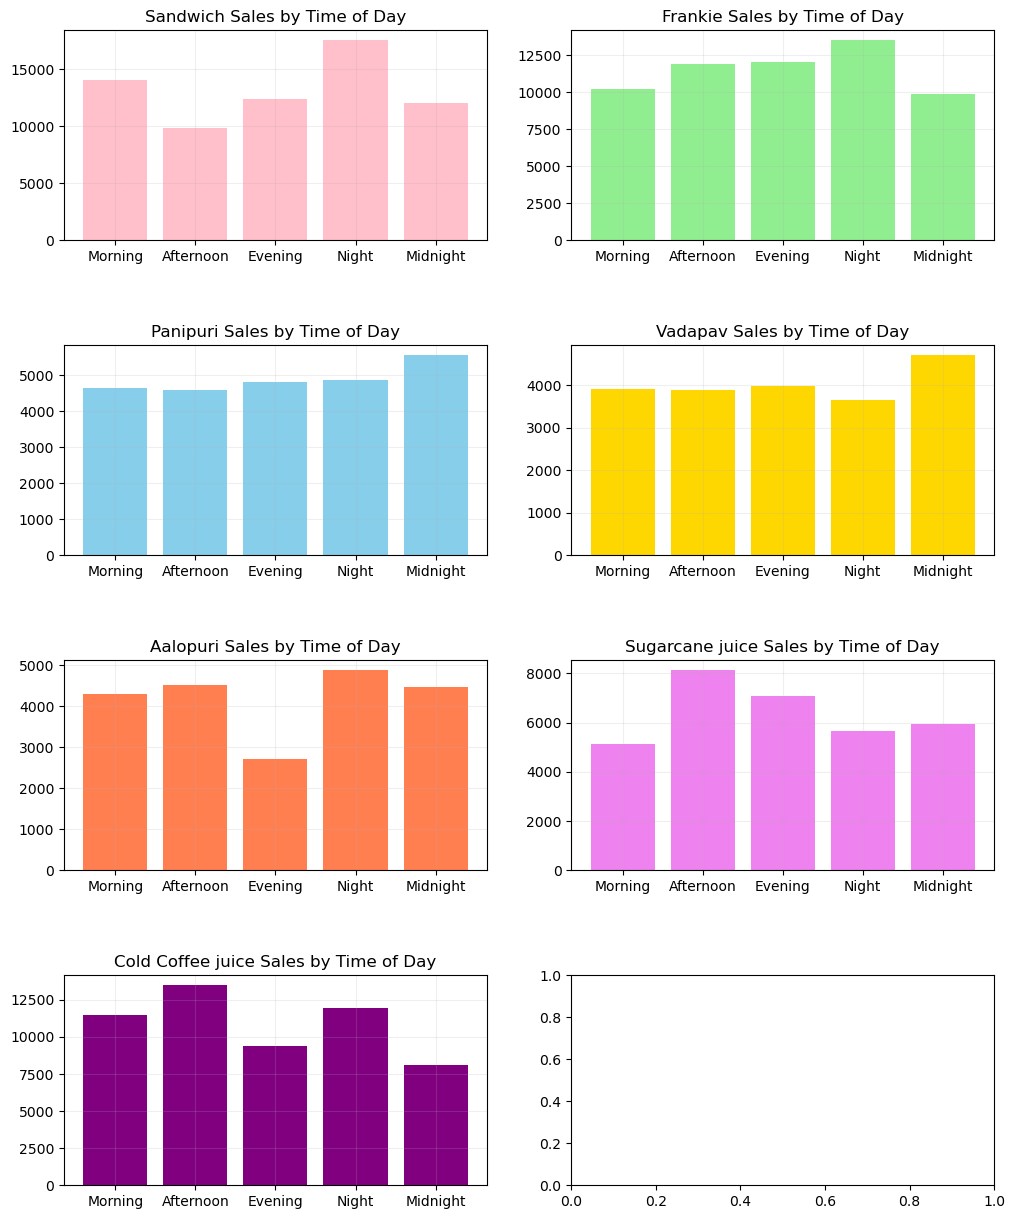

In [80]:
fig, ((bar1, bar2), (bar3, bar4), (bar5, bar6), (bar7,_)) = plt.subplots(4, 2, figsize=(12, 15))


bar1.bar(tod_sandwich['time_of_sale'], tod_sandwich['transaction_amount'], color='pink')
bar1.set_title('Sandwich Sales by Time of Day')
bar1.grid(alpha = 0.2)

bar2.bar(tod_frankie['time_of_sale'], tod_frankie['transaction_amount'], color='lightgreen')
bar2.set_title('Frankie Sales by Time of Day')
bar2.grid(alpha = 0.2)

bar3.bar(tod_panipuri['time_of_sale'], tod_panipuri['transaction_amount'], color='skyblue')
bar3.set_title('Panipuri Sales by Time of Day')
bar3.grid(alpha = 0.2)

bar4.bar(tod_vadapav['time_of_sale'], tod_vadapav['transaction_amount'], color='gold')
bar4.set_title('Vadapav Sales by Time of Day')
bar4.grid(alpha = 0.2)

bar5.bar(tod_aalopuri['time_of_sale'], tod_aalopuri['transaction_amount'], color='coral')
bar5.set_title('Aalopuri Sales by Time of Day')
bar5.grid(alpha = 0.2)

bar6.bar(tod_sugarcane['time_of_sale'], tod_sugarcane['transaction_amount'], color='violet')
bar6.set_title('Sugarcane juice Sales by Time of Day')
bar6.grid(alpha = 0.2)

bar7.bar(tod_coldcoffee['time_of_sale'], tod_coldcoffee['transaction_amount'], color='purple')
bar7.set_title('Cold Coffee juice Sales by Time of Day')
bar7.grid(alpha = 0.2)


plt.subplots_adjust(hspace=0.5)
plt.show()



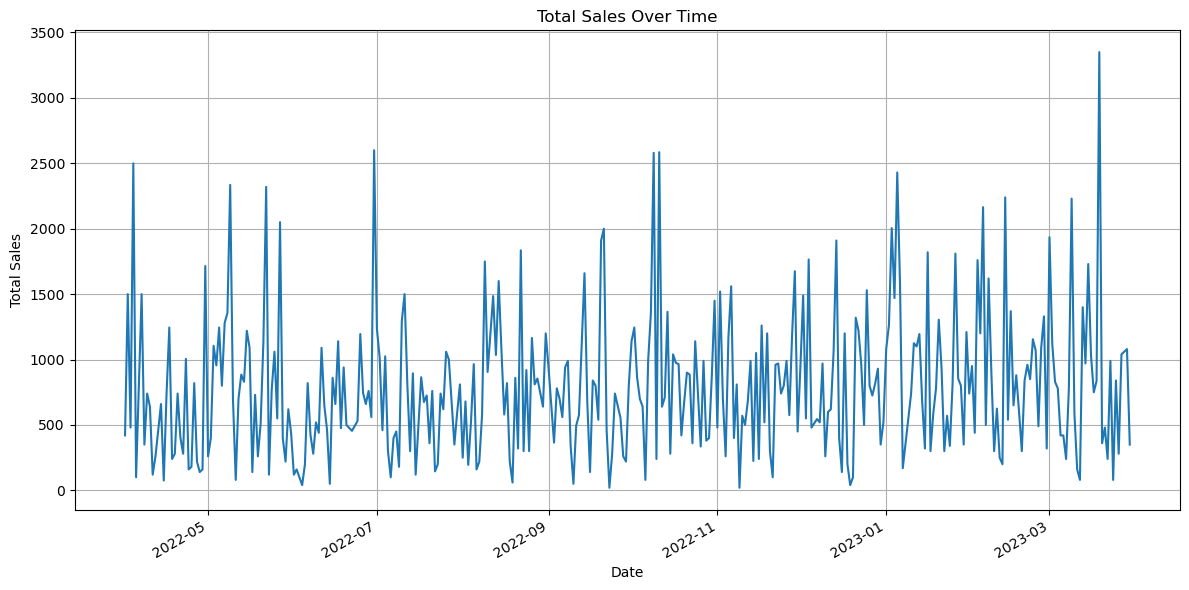

In [57]:
plt.figure(figsize=(12,6))
sales_by_date = df.groupby('date')['transaction_amount'].sum()
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
np.unique(df["item_price"])

array([20, 25, 40, 50, 60], dtype=int64)

In [55]:
filt=df.groupby("item_name")["item_price"].value_counts()
filt

item_name        item_price
Aalopuri         20            134
Cold coffee      40            161
Frankie          50            139
Panipuri         20            150
Sandwich         60            129
Sugarcane juice  25            153
Vadapav          20            134
Name: item_price, dtype: int64

In [59]:
df.sample()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month,dayname,monthnaame
395,396,2022-10-31,Frankie,Fastfood,50,15,750,Online,Mr.,Morning,2022,10,Monday,October


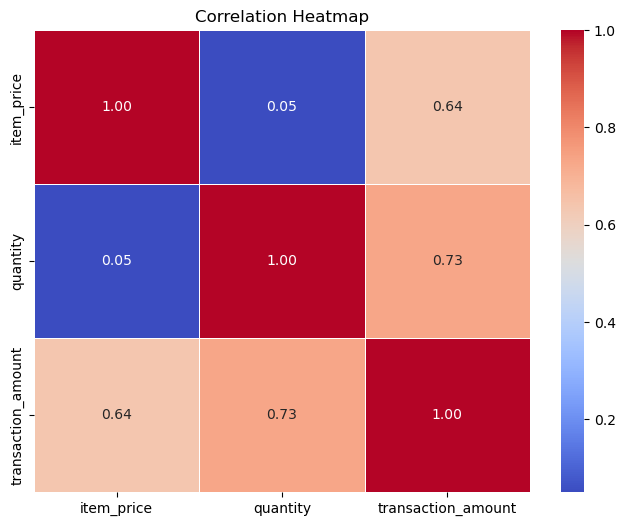

In [61]:
corr = df[['item_price', 'quantity', 'transaction_amount']].corr()

plt.figure(figsize=(8, 6))
sbn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()